# 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/skt.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']
df.info()
ts
df.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2021-12-16 to 2022-12-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       246 non-null    float64
 1   High       246 non-null    float64
 2   Low        246 non-null    float64
 3   Close      246 non-null    float64
 4   Adj Close  246 non-null    float64
 5   Volume     246 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


DatetimeIndex(['2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29',
               ...
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

# 데이터 전처리

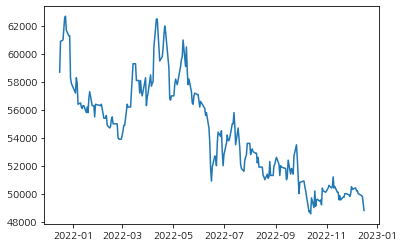

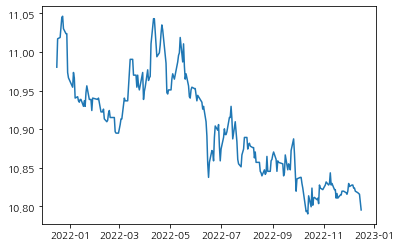

In [5]:
ts[ts.isnull()]
plt.plot(ts)
plt.show()

ts = np.log(ts)
plt.plot(ts_log)
plt.show()

# Stationay Data 검증

In [6]:
#한글폰트 추가
plt.rc('font',family='NanumGothic')

# 정성적 분석

In [9]:
def plot_rolling_test(ts, window):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    
    plt.plot(ts, color="blue", label="주가")
    plt.plot(rolling_mean, color="red", label="{}합의 평균".format(window))
    #plt.plot(rolling_std, color="green", label="{}합의 표준편차".format(window))
    plt.legend(loc="best")
    plt.title("{}일치 합의 평균/편차 그래프".format(window))
    plt.show()

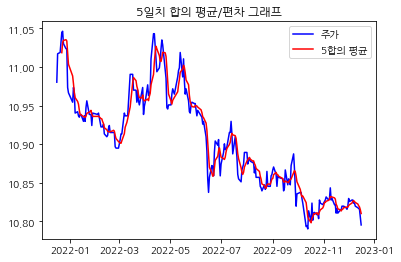

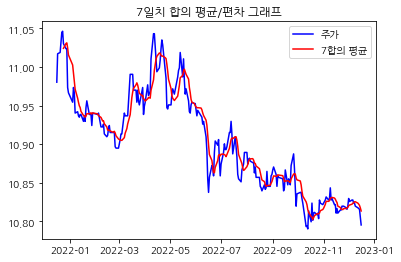

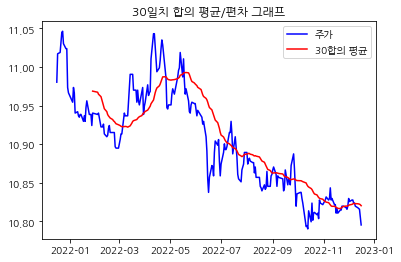

In [10]:
plot_rolling_test(ts, 5)
plot_rolling_test(ts, 7)
plot_rolling_test(ts, 30)

# 정량적 분석

In [12]:
def station_test(ts):
    test_set = adfuller(ts, autolag="AIC")
    print(test_set)
    print()
    print("=====================================")
    print("Test Staticd = {}".format(test_set[0]))
    print("p_value = {}".format(test_set[1]))
    print("Lags Used = {}".format(test_set[2]))
    print("Number of Obsevations Used : {}".format(test_set[3]))
    print("=====================================")

In [13]:
station_test(ts)

(-1.490401399517458, 0.5382541728334708, 0, 245, {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}, -1317.383201843433)

Test Staticd = -1.490401399517458
p_value = 0.5382541728334708
Lags Used = 0
Number of Obsevations Used : 245


# 시계열 분해

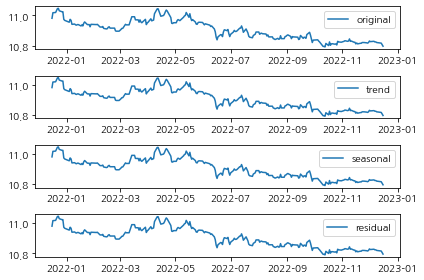

In [14]:
decomposit = seasonal_decompose(ts, period=10)

trend = decomposit.trend
seasonal = decomposit.seasonal
residual = decomposit.resid

lt = ["original", "trend", "seasonal", "residual"]
for i in range(411, 415):
    plt.subplot(i)
    plt.plot(ts, label="{}".format(lt[i-411]))
    plt.legend(loc="best")
    plt.tight_layout()
plt.show()

# Residual stationay 검정

In [15]:
residual.dropna(inplace=True)
station_test(residual)

(-7.897084175546561, 4.2822235659143366e-12, 11, 224, {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}, -1377.496255779516)

Test Staticd = -7.897084175546561
p_value = 4.2822235659143366e-12
Lags Used = 11
Number of Obsevations Used : 224


# ARIMA 파라미터 설정

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


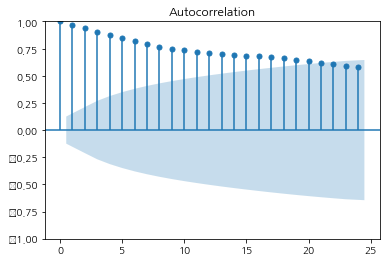

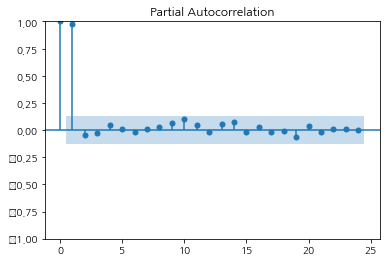

In [16]:
#p와 q 선정 (p >= 1, q = ?)
plot_acf(ts)
plot_pacf(ts)
plt.show()

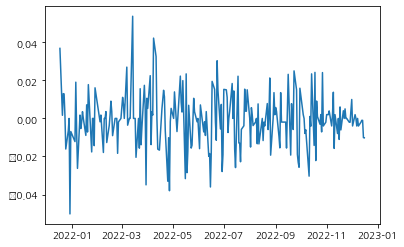

(-15.831613271342798, 9.928103215100396e-29, 0, 244, {'1%': -3.457437824930831, '5%': -2.873459364726563, '10%': -2.573122099570008}, -1308.9101438703556)

Test Staticd = -15.831613271342798
p_value = 9.928103215100396e-29
Lags Used = 0
Number of Obsevations Used : 244


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


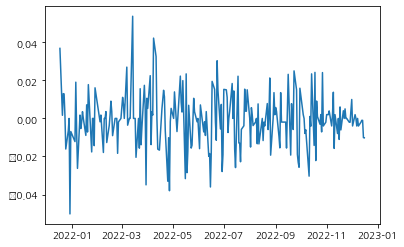

(-7.236613969793171, 1.9321239207530981e-10, 15, 228, {'1%': -3.4593607492757554, '5%': -2.8743015807562924, '10%': -2.5735714042782396}, -1273.5379932429257)

Test Staticd = -7.236613969793171
p_value = 1.9321239207530981e-10
Lags Used = 15
Number of Obsevations Used : 228


In [17]:
#d선정 (d = 1)
diff1 = ts.diff(periods=1).iloc[1:]
plt.plot(diff1)
plt.show()
station_test(diff1)

diff2 = diff1.diff(periods=1).iloc[1:]
plt.plot(diff1)
plt.show()
station_test(diff2)

# 데이터셋 분리

In [18]:
print(len(ts))

246


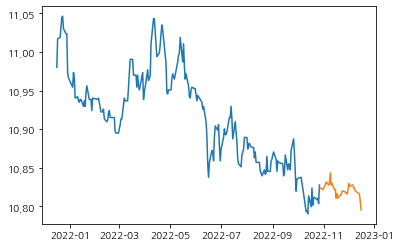

In [20]:
train_size = 210
train = ts[:train_size]
test = ts[train_size:]

plt.plot(train)
plt.plot(test)
plt.show()

# ARIMA 모델

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  210
Model:                ARIMA(18, 1, 0)   Log Likelihood                 589.305
Date:                Fri, 16 Dec 2022   AIC                          -1140.610
Time:                        08:09:52   BIC                          -1077.106
Sample:                             0   HQIC                         -1114.935
                                - 210                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0076      0.076     -0.100      0.920      -0.157       0.142
ar.L2          0.0300      0.081      0.369      0.712      -0.129       0.189
ar.L3         -0.1240      0.083     -1.500      0.1

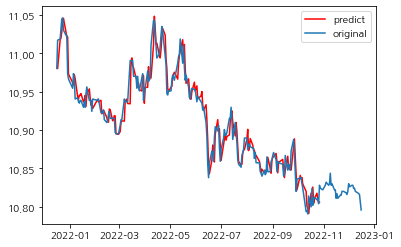

In [34]:
model = ARIMA(train, order=(18, 1, 0))
fitted_model = model.fit()
print(fitted_model.summary())

fitted_model = fitted_model.predict()
fitted_model = fitted_model.drop(fitted_model.index[0])

plt.plot(fitted_model, label='predict', color="red")
plt.plot(ts, label='original')
plt.legend()

# 예측모델 시각화

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


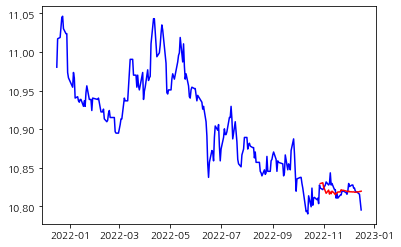

In [35]:
fitted_model = model.fit()
predict = fitted_model.forecast(len(test))
predictions = pd.Series(predict.values, index=test.index)

plt.plot(ts, label="original", color="blue")
plt.plot(predictions, label="prediction", color="red")
plt.show()

# 오차률 검산

In [36]:
mape = np.mean(np.abs(np.exp(predictions) - np.exp(test))/np.abs(np.exp(test)))
print('MAPE: {:.2f}%'.format(mape*100))

MAPE: 0.68%
